In [1]:
from torch import nn
import torch

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, first_stage=False):
        super().__init__()
        stride = 2 if first_stage else 1
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.dropout = nn.Dropout(p=0.5)  # giữ 50% units
        self.relu = nn.ReLU(inplace=True)

        self.downsample = None
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)
        return out

class ResNet34(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.conv2_x = nn.Sequential(
            BasicBlock(in_channels=64, out_channels=64),
            BasicBlock(in_channels=64, out_channels=64),
            BasicBlock(in_channels=64, out_channels=64)
        )
        self.conv3_x = nn.Sequential(
            BasicBlock(in_channels=64, out_channels=128, first_stage=True),
            BasicBlock(in_channels=128, out_channels=128),
            BasicBlock(in_channels=128, out_channels=128),
            BasicBlock(in_channels=128, out_channels=128)
        )
        self.conv4_x = nn.Sequential(
            BasicBlock(in_channels=128, out_channels=256, first_stage=True),
            BasicBlock(in_channels=256, out_channels=256),
            BasicBlock(in_channels=256, out_channels=256),
            BasicBlock(in_channels=256, out_channels=256),
            BasicBlock(in_channels=256, out_channels=256),
            BasicBlock(in_channels=256, out_channels=256)
        )
        self.conv5_x = nn.Sequential(
            BasicBlock(in_channels=256, out_channels=512, first_stage=True),
            BasicBlock(in_channels=512, out_channels=512),
            BasicBlock(in_channels=512, out_channels=512)
        )
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(p=0.5)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2_x(x)
        x = self.conv3_x(x)
        x = self.conv4_x(x)
        x = self.conv5_x(x)
        x = self.avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x



🔹 Epoch 1/40


💾 Saved best model (val acc: 67.19%) to '../models/resnet34.pth'
✅ Epoch 1/40 -- Train Loss: 1.2171, Train Acc: 51.62% | Val Loss: 0.8254, Val Acc: 67.19%

🔹 Epoch 2/40


✅ Epoch 2/40 -- Train Loss: 0.9051, Train Acc: 65.00% | Val Loss: 1.0661, Val Acc: 57.20%

🔹 Epoch 3/40


💾 Saved best model (val acc: 78.46%) to '../models/resnet34.pth'
✅ Epoch 3/40 -- Train Loss: 0.7873, Train Acc: 70.13% | Val Loss: 0.5871, Val Acc: 78.46%

🔹 Epoch 4/40


✅ Epoch 4/40 -- Train Loss: 0.7267, Train Acc: 72.92% | Val Loss: 0.5954, Val Acc: 77.96%

🔹 Epoch 5/40


💾 Saved best model (val acc: 81.28%) to '../models/resnet34.pth'
✅ Epoch 5/40 -- Train Loss: 0.6839, Train Acc: 74.21% | Val Loss: 0.5151, Val Acc: 81.28%

🔹 Epoch 6/40


✅ Epoch 6/40 -- Train Loss: 0.6333, Train Acc: 76.35% | Val Loss: 0.6908, Val Acc: 74.54%

🔹 Epoch 7/40


✅ Epoch 7/40 -- Train Loss: 0.6084, Train Acc: 77.50% | Val Loss: 0.5581, Val Acc: 80.88%

🔹 Epoch 8/40


✅ Epoch 8/40 -- Train Loss: 0.5879, Train Acc: 78.13% | Val Loss: 0.5533, Val Acc: 78.99%

🔹 Epoch 9/40


💾 Saved best model (val acc: 84.17%) to '../models/resnet34.pth'
✅ Epoch 9/40 -- Train Loss: 0.5617, Train Acc: 79.41% | Val Loss: 0.4643, Val Acc: 84.17%

🔹 Epoch 10/40


✅ Epoch 10/40 -- Train Loss: 0.5405, Train Acc: 80.79% | Val Loss: 0.5405, Val Acc: 79.56%

🔹 Epoch 11/40


✅ Epoch 11/40 -- Train Loss: 0.5162, Train Acc: 80.96% | Val Loss: 0.4624, Val Acc: 82.85%

🔹 Epoch 12/40


💾 Saved best model (val acc: 85.13%) to '../models/resnet34.pth'
✅ Epoch 12/40 -- Train Loss: 0.4962, Train Acc: 82.46% | Val Loss: 0.4310, Val Acc: 85.13%

🔹 Epoch 13/40


✅ Epoch 13/40 -- Train Loss: 0.4814, Train Acc: 82.65% | Val Loss: 0.4795, Val Acc: 82.45%

🔹 Epoch 14/40


💾 Saved best model (val acc: 86.80%) to '../models/resnet34.pth'
✅ Epoch 14/40 -- Train Loss: 0.4727, Train Acc: 82.99% | Val Loss: 0.3882, Val Acc: 86.80%

🔹 Epoch 15/40


✅ Epoch 15/40 -- Train Loss: 0.4576, Train Acc: 83.54% | Val Loss: 0.4536, Val Acc: 83.84%

🔹 Epoch 16/40


✅ Epoch 16/40 -- Train Loss: 0.4420, Train Acc: 83.70% | Val Loss: 0.3891, Val Acc: 86.55%

🔹 Epoch 17/40


✅ Epoch 17/40 -- Train Loss: 0.4352, Train Acc: 84.21% | Val Loss: 0.4027, Val Acc: 86.06%

🔹 Epoch 18/40


✅ Epoch 18/40 -- Train Loss: 0.4197, Train Acc: 84.49% | Val Loss: 0.4142, Val Acc: 86.06%

🔹 Epoch 19/40


💾 Saved best model (val acc: 87.02%) to '../models/resnet34.pth'
✅ Epoch 19/40 -- Train Loss: 0.4225, Train Acc: 84.90% | Val Loss: 0.3744, Val Acc: 87.02%

🔹 Epoch 20/40


✅ Epoch 20/40 -- Train Loss: 0.4170, Train Acc: 85.06% | Val Loss: 0.3719, Val Acc: 86.95%

🔹 Epoch 21/40


💾 Saved best model (val acc: 88.12%) to '../models/resnet34.pth'
✅ Epoch 21/40 -- Train Loss: 0.3993, Train Acc: 85.45% | Val Loss: 0.3591, Val Acc: 88.12%

🔹 Epoch 22/40


✅ Epoch 22/40 -- Train Loss: 0.3971, Train Acc: 85.70% | Val Loss: 0.3576, Val Acc: 87.91%

🔹 Epoch 23/40


💾 Saved best model (val acc: 88.69%) to '../models/resnet34.pth'
✅ Epoch 23/40 -- Train Loss: 0.3909, Train Acc: 85.66% | Val Loss: 0.3417, Val Acc: 88.69%

🔹 Epoch 24/40


✅ Epoch 24/40 -- Train Loss: 0.3716, Train Acc: 86.38% | Val Loss: 0.3405, Val Acc: 87.91%

🔹 Epoch 25/40


✅ Epoch 25/40 -- Train Loss: 0.3781, Train Acc: 86.21% | Val Loss: 0.3499, Val Acc: 87.70%

🔹 Epoch 26/40


💾 Saved best model (val acc: 89.23%) to '../models/resnet34.pth'
✅ Epoch 26/40 -- Train Loss: 0.3751, Train Acc: 86.37% | Val Loss: 0.3229, Val Acc: 89.23%

🔹 Epoch 27/40


✅ Epoch 27/40 -- Train Loss: 0.3567, Train Acc: 87.13% | Val Loss: 0.3527, Val Acc: 88.09%

🔹 Epoch 28/40


✅ Epoch 28/40 -- Train Loss: 0.3458, Train Acc: 87.64% | Val Loss: 0.3349, Val Acc: 88.02%

🔹 Epoch 29/40


✅ Epoch 29/40 -- Train Loss: 0.3477, Train Acc: 86.99% | Val Loss: 0.3458, Val Acc: 87.48%

🔹 Epoch 30/40


✅ Epoch 30/40 -- Train Loss: 0.3456, Train Acc: 87.74% | Val Loss: 0.3540, Val Acc: 87.23%

🔹 Epoch 31/40


✅ Epoch 31/40 -- Train Loss: 0.3391, Train Acc: 87.68% | Val Loss: 0.3275, Val Acc: 89.12%

🔹 Epoch 32/40


✅ Epoch 32/40 -- Train Loss: 0.3344, Train Acc: 87.83% | Val Loss: 0.3885, Val Acc: 86.84%

🔹 Epoch 33/40


✅ Epoch 33/40 -- Train Loss: 0.3299, Train Acc: 88.05% | Val Loss: 0.3258, Val Acc: 89.19%

🔹 Epoch 34/40


✅ Epoch 34/40 -- Train Loss: 0.3220, Train Acc: 88.29% | Val Loss: 0.3246, Val Acc: 88.09%

🔹 Epoch 35/40


💾 Saved best model (val acc: 89.37%) to '../models/resnet34.pth'
✅ Epoch 35/40 -- Train Loss: 0.3172, Train Acc: 88.72% | Val Loss: 0.3135, Val Acc: 89.37%

🔹 Epoch 36/40


💾 Saved best model (val acc: 89.76%) to '../models/resnet34.pth'
✅ Epoch 36/40 -- Train Loss: 0.3169, Train Acc: 88.39% | Val Loss: 0.3034, Val Acc: 89.76%

🔹 Epoch 37/40


✅ Epoch 37/40 -- Train Loss: 0.3056, Train Acc: 89.03% | Val Loss: 0.3496, Val Acc: 88.66%

🔹 Epoch 38/40


✅ Epoch 38/40 -- Train Loss: 0.3174, Train Acc: 88.43% | Val Loss: 0.3102, Val Acc: 89.23%

🔹 Epoch 39/40


💾 Saved best model (val acc: 89.80%) to '../models/resnet34.pth'
✅ Epoch 39/40 -- Train Loss: 0.3036, Train Acc: 88.66% | Val Loss: 0.2974, Val Acc: 89.80%

🔹 Epoch 40/40


✅ Epoch 40/40 -- Train Loss: 0.3063, Train Acc: 88.88% | Val Loss: 0.3220, Val Acc: 89.19%

🎯 Training complete. Best Val Acc: 89.80%
Test Loss: 0.3007
Test Accuracy: 88.53%

Classification Report:
              precision    recall  f1-score   support

   buildings       0.88      0.89      0.88       437
      forest       0.98      0.97      0.98       474
     glacier       0.84      0.82      0.83       553
    mountain       0.81      0.84      0.83       525
         sea       0.91      0.89      0.90       510
      street       0.90      0.91      0.91       501

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



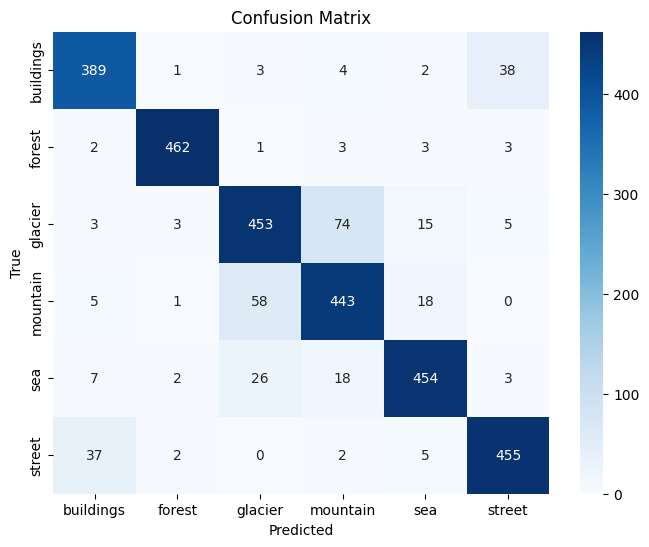

In [4]:
import sys
sys.path.insert(0, '/datastore/cndt_hangdv/music-project/style_transfer/lab04/src')
import importlib
import dataset
import train
importlib.reload(dataset)
importlib.reload(train)
from dataset import loader_dict, dataset_dict
from train import train_model, test_model

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
resnet = ResNet34(num_classes=6).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.parameters(), lr=1e-4)
save_path = '../models/resnet34.pth'
class_names = dataset_dict['train'].class_names
train_model(resnet, loader_dict, dataset_dict, num_epochs=40, criterion=criterion, optimizer=optimizer, device=device, save_path=save_path)
test_model(save_path, resnet, loader_dict['test'], dataset_dict['test'], criterion, device, class_names)
